In [130]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
data=pd.read_csv("C:\\Users\\lenovo\\OneDrive\\data science\\assignment\\Decision tree\\Company_Data.csv")
data

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

# EDA

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [67]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [68]:
data['ShelveLoc'] = data['ShelveLoc'].astype('category')
data['Urban'] = data['Urban'].astype('category')
data['US'] = data['US'].astype('category')

In [69]:
data.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc      category
Age               int64
Education         int64
Urban          category
US             category
dtype: object

In [70]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [71]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [72]:
data[data.duplicated()]

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []

In [73]:
data.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [74]:
data['ShelveLoc']=data['ShelveLoc'].cat.codes
data['US']=data['US'].cat.codes
data['Urban']=data['Urban'].cat.codes
data


Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50        138      73           11         276    120          0   42   
1    11.22        111      48           16         260     83          1   65   
2    10.06        113      35           10         269     80          2   59   
3     7.40        117     100            4         466     97          2   55   
4     4.15        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395  12.57        138     108           17         203    128          1   33   
396   6.14        139      23            3          37    120          2   55   
397   7.41        162      26           12         368    159          2   40   
398   5.94        100      79            7         284     95          0   50   
399   9.71        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   0  
..         ...    ...  ..  
395         14      1   1  
396         11      0   1  
397         18      1   1  
398         12      1   1  
399         16      1   1  

[400 rows x 11 columns]

In [76]:
sales_cat=[]
for i in data['Sales']:
    if i<=7.49:
        sales_cat.append('Low')
    else:
        sales_cat.append('High')

In [78]:
data['Sales_cat']=sales_cat

In [79]:
data

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50        138      73           11         276    120          0   42   
1    11.22        111      48           16         260     83          1   65   
2    10.06        113      35           10         269     80          2   59   
3     7.40        117     100            4         466     97          2   55   
4     4.15        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395  12.57        138     108           17         203    128          1   33   
396   6.14        139      23            3          37    120          2   55   
397   7.41        162      26           12         368    159          2   40   
398   5.94        100      79            7         284     95          0   50   
399   9.71        134      37            0          27    120          1   49   

     Education  Urban  US Sales_cat  
0           17      1   1      High  
1           10      1   1      High  
2           12      1   1      High  
3           14      1   1       Low  
4           13      1   0       Low  
..         ...    ...  ..       ...  
395         14      1   1      High  
396         11      0   1       Low  
397         18      1   1       Low  
398         12      1   1       Low  
399         16      1   1      High  

[400 rows x 12 columns]

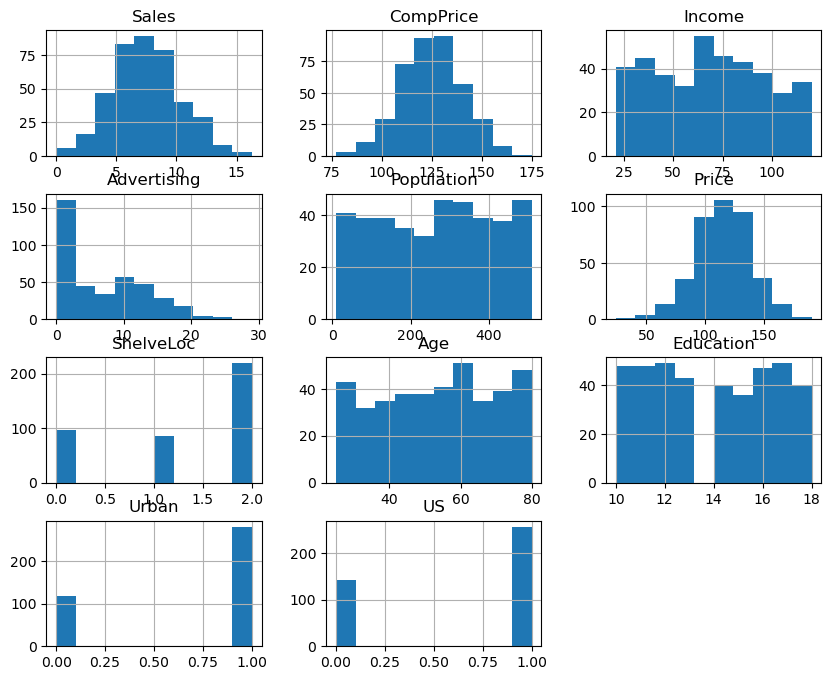

In [84]:
data.hist(figsize=(10,8),);

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

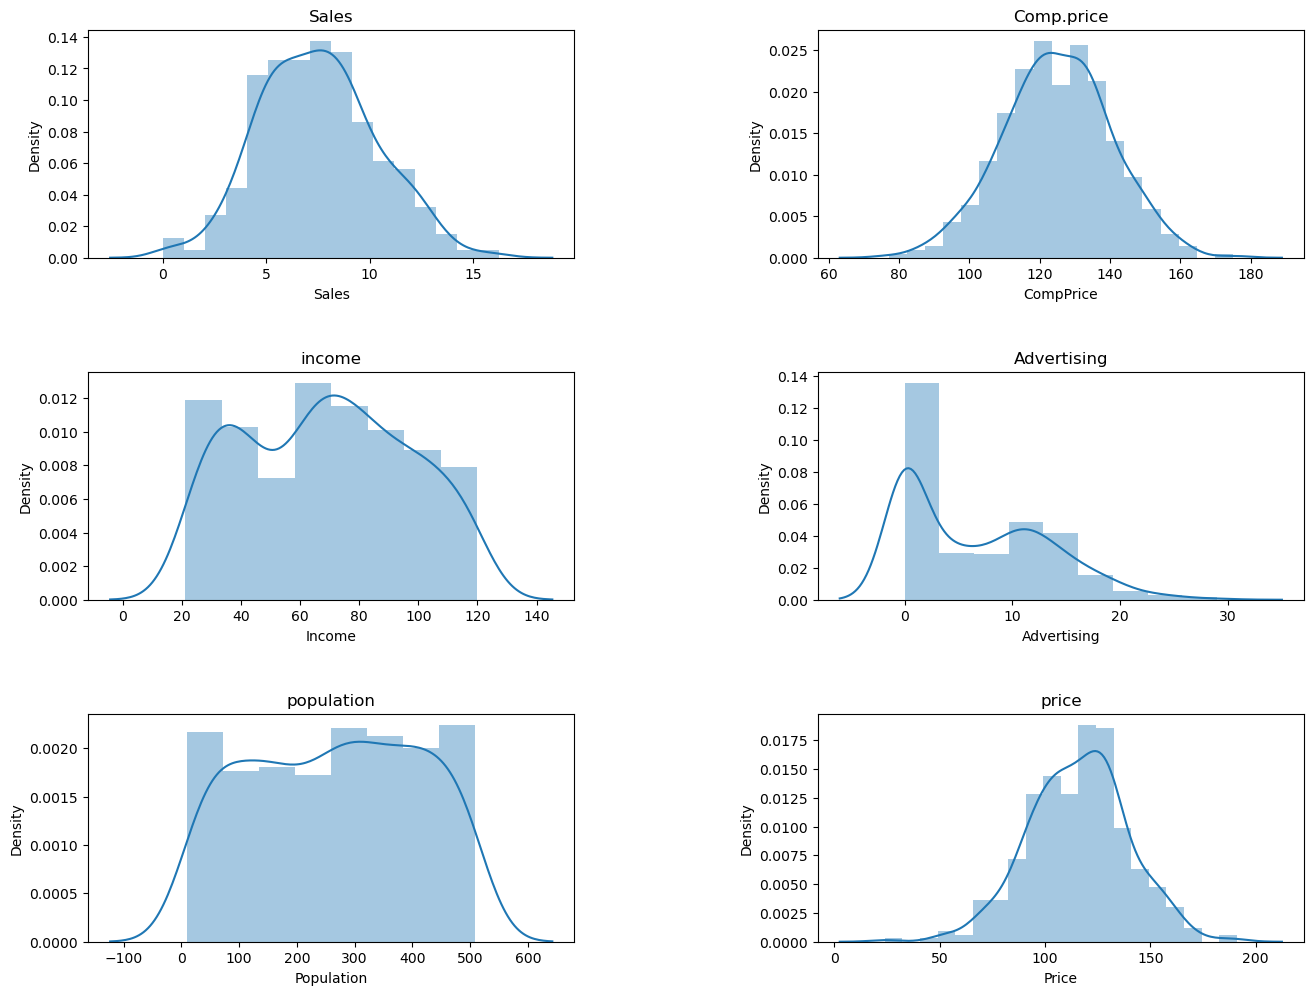

In [87]:
plt.subplots_adjust(left=0.1,bottom=0.1,right=2,top=2, wspace=0.5,hspace=0.5)
plt.subplot(3,2,1)
sns.distplot(data['Sales'])
plt.title('Sales')
plt.subplot(3,2,2)
sns.distplot(data['CompPrice'])
plt.title('Comp.price')
plt.subplot(3,2,3)
sns.distplot(data['Income'])
plt.title('income')
plt.subplot(3,2,4)
sns.distplot(data['Advertising'])
plt.title('Advertising')
plt.subplot(3,2,5)
sns.distplot(data['Population'])
plt.title('population')
plt.subplot(3,2,6)
sns.distplot(data['Price'])
plt.title('price')
plt.show()

<AxesSubplot:>

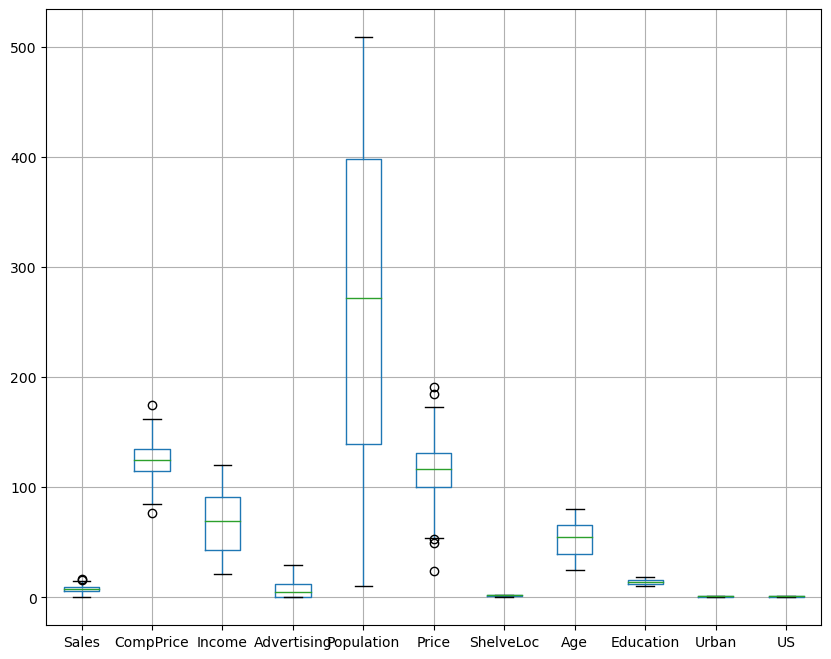

In [92]:
data.boxplot(figsize=(10,8))

# There are few outliers in sales,comprice,price.

In [93]:
data.corr()

Sales  CompPrice    Income  Advertising  Population     Price  \
Sales        1.000000   0.064079  0.151951     0.269507    0.050471 -0.444951   
CompPrice    0.064079   1.000000 -0.080653    -0.024199   -0.094707  0.584848   
Income       0.151951  -0.080653  1.000000     0.058995   -0.007877 -0.056698   
Advertising  0.269507  -0.024199  0.058995     1.000000    0.265652  0.044537   
Population   0.050471  -0.094707 -0.007877     0.265652    1.000000 -0.012144   
Price       -0.444951   0.584848 -0.056698     0.044537   -0.012144  1.000000   
ShelveLoc    0.157470   0.023350 -0.067678     0.008544   -0.044772  0.014633   
Age         -0.231815  -0.100239 -0.004670    -0.004557   -0.042663 -0.102177   
Education   -0.051955   0.025197 -0.056855    -0.033594   -0.106378  0.011747   
Urban       -0.015419   0.066594  0.037967     0.042035   -0.052025  0.047016   
US           0.177093   0.016869  0.089601     0.684460    0.060564  0.057861   

             ShelveLoc       Age  Education     Urban        US  
Sales         0.157470 -0.231815  -0.051955 -0.015419  0.177093  
CompPrice     0.023350 -0.100239   0.025197  0.066594  0.016869  
Income       -0.067678 -0.004670  -0.056855  0.037967  0.089601  
Advertising   0.008544 -0.004557  -0.033594  0.042035  0.684460  
Population   -0.044772 -0.042663  -0.106378 -0.052025  0.060564  
Price         0.014633 -0.102177   0.011747  0.047016  0.057861  
ShelveLoc     1.000000  0.056488   0.001492 -0.063978 -0.039760  
Age           0.056488  1.000000   0.006488  0.028479  0.008652  
Education     0.001492  0.006488   1.000000 -0.033094 -0.078250  
Urban        -0.063978  0.028479  -0.033094  1.000000  0.047085  
US           -0.039760  0.008652  -0.078250  0.047085  1.000000

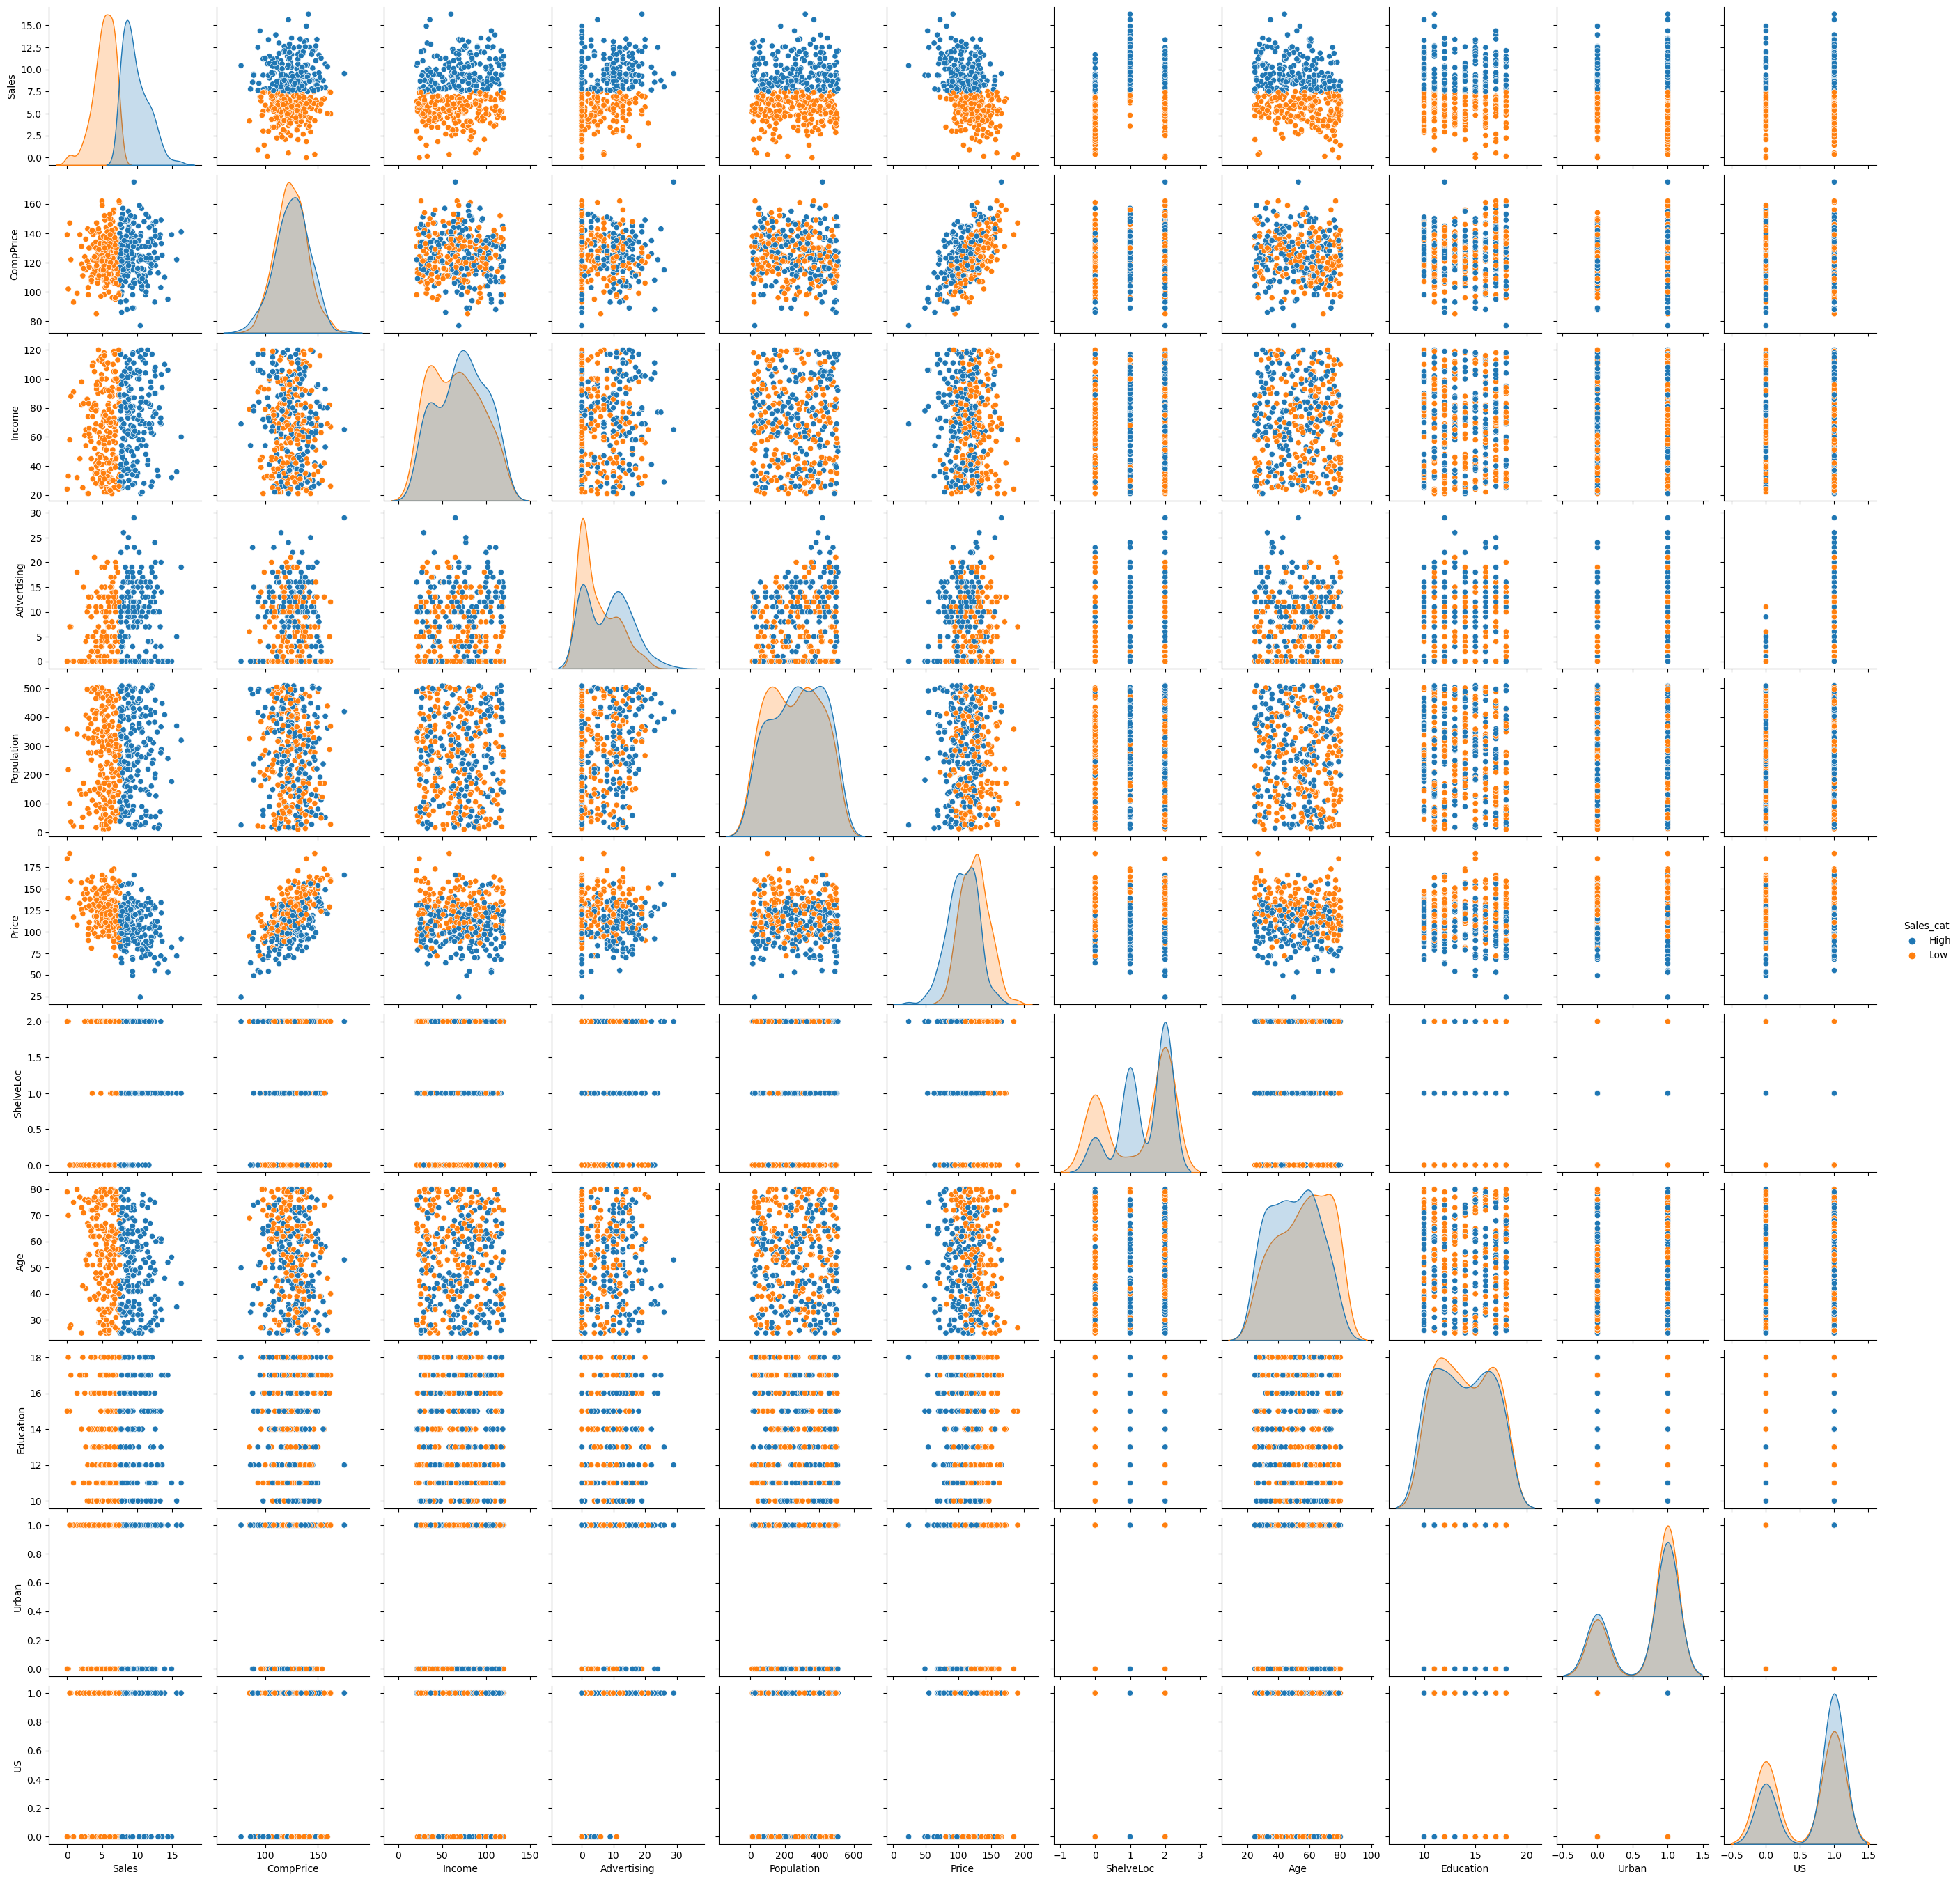

In [94]:
sns.pairplot(data=data,hue='Sales_cat')

# normalization

In [96]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [99]:
data1=norm_func(data.iloc[:,:11])
data1

Sales  CompPrice    Income  Advertising  Population     Price  \
0    0.583897   0.622449  0.525253     0.379310    0.533066  0.574850   
1    0.689613   0.346939  0.272727     0.551724    0.501002  0.353293   
2    0.618316   0.367347  0.141414     0.344828    0.519038  0.335329   
3    0.454825   0.408163  0.797980     0.137931    0.913828  0.437126   
4    0.255071   0.653061  0.434343     0.103448    0.661323  0.622754   
..        ...        ...       ...          ...         ...       ...   
395  0.772588   0.622449  0.878788     0.586207    0.386774  0.622754   
396  0.377382   0.632653  0.020202     0.103448    0.054108  0.574850   
397  0.455439   0.867347  0.050505     0.413793    0.717435  0.808383   
398  0.365089   0.234694  0.585859     0.241379    0.549098  0.425150   
399  0.596804   0.581633  0.161616     0.000000    0.034068  0.574850   

     ShelveLoc       Age  Education  Urban   US  
0          0.0  0.309091      0.875    1.0  1.0  
1          0.5  0.727273      0.000    1.0  1.0  
2          1.0  0.618182      0.250    1.0  1.0  
3          1.0  0.545455      0.500    1.0  1.0  
4          0.0  0.236364      0.375    1.0  0.0  
..         ...       ...        ...    ...  ...  
395        0.5  0.145455      0.500    1.0  1.0  
396        1.0  0.545455      0.125    0.0  1.0  
397        1.0  0.272727      1.000    1.0  1.0  
398        0.0  0.454545      0.250    1.0  1.0  
399        0.5  0.436364      0.750    1.0  1.0  

[400 rows x 11 columns]

In [101]:
x=data1.drop(columns=['Sales'],axis=1)


In [102]:
y=data['Sales_cat']

# Train test split

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Finding out the best hyperparameter for building the Tree

In [105]:
model=DecisionTreeClassifier()

In [106]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = model, param_grid = {'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9,10,11,12]} , cv= 5)
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})

In [107]:
grid_search.fit(x,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})

In [108]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 8}

 # Decision tree using entropy 

In [110]:
model1=DecisionTreeClassifier(criterion = 'entropy',max_depth=8)

In [111]:
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

Text(0.5, 1.0, 'Decision tree using Entropy')

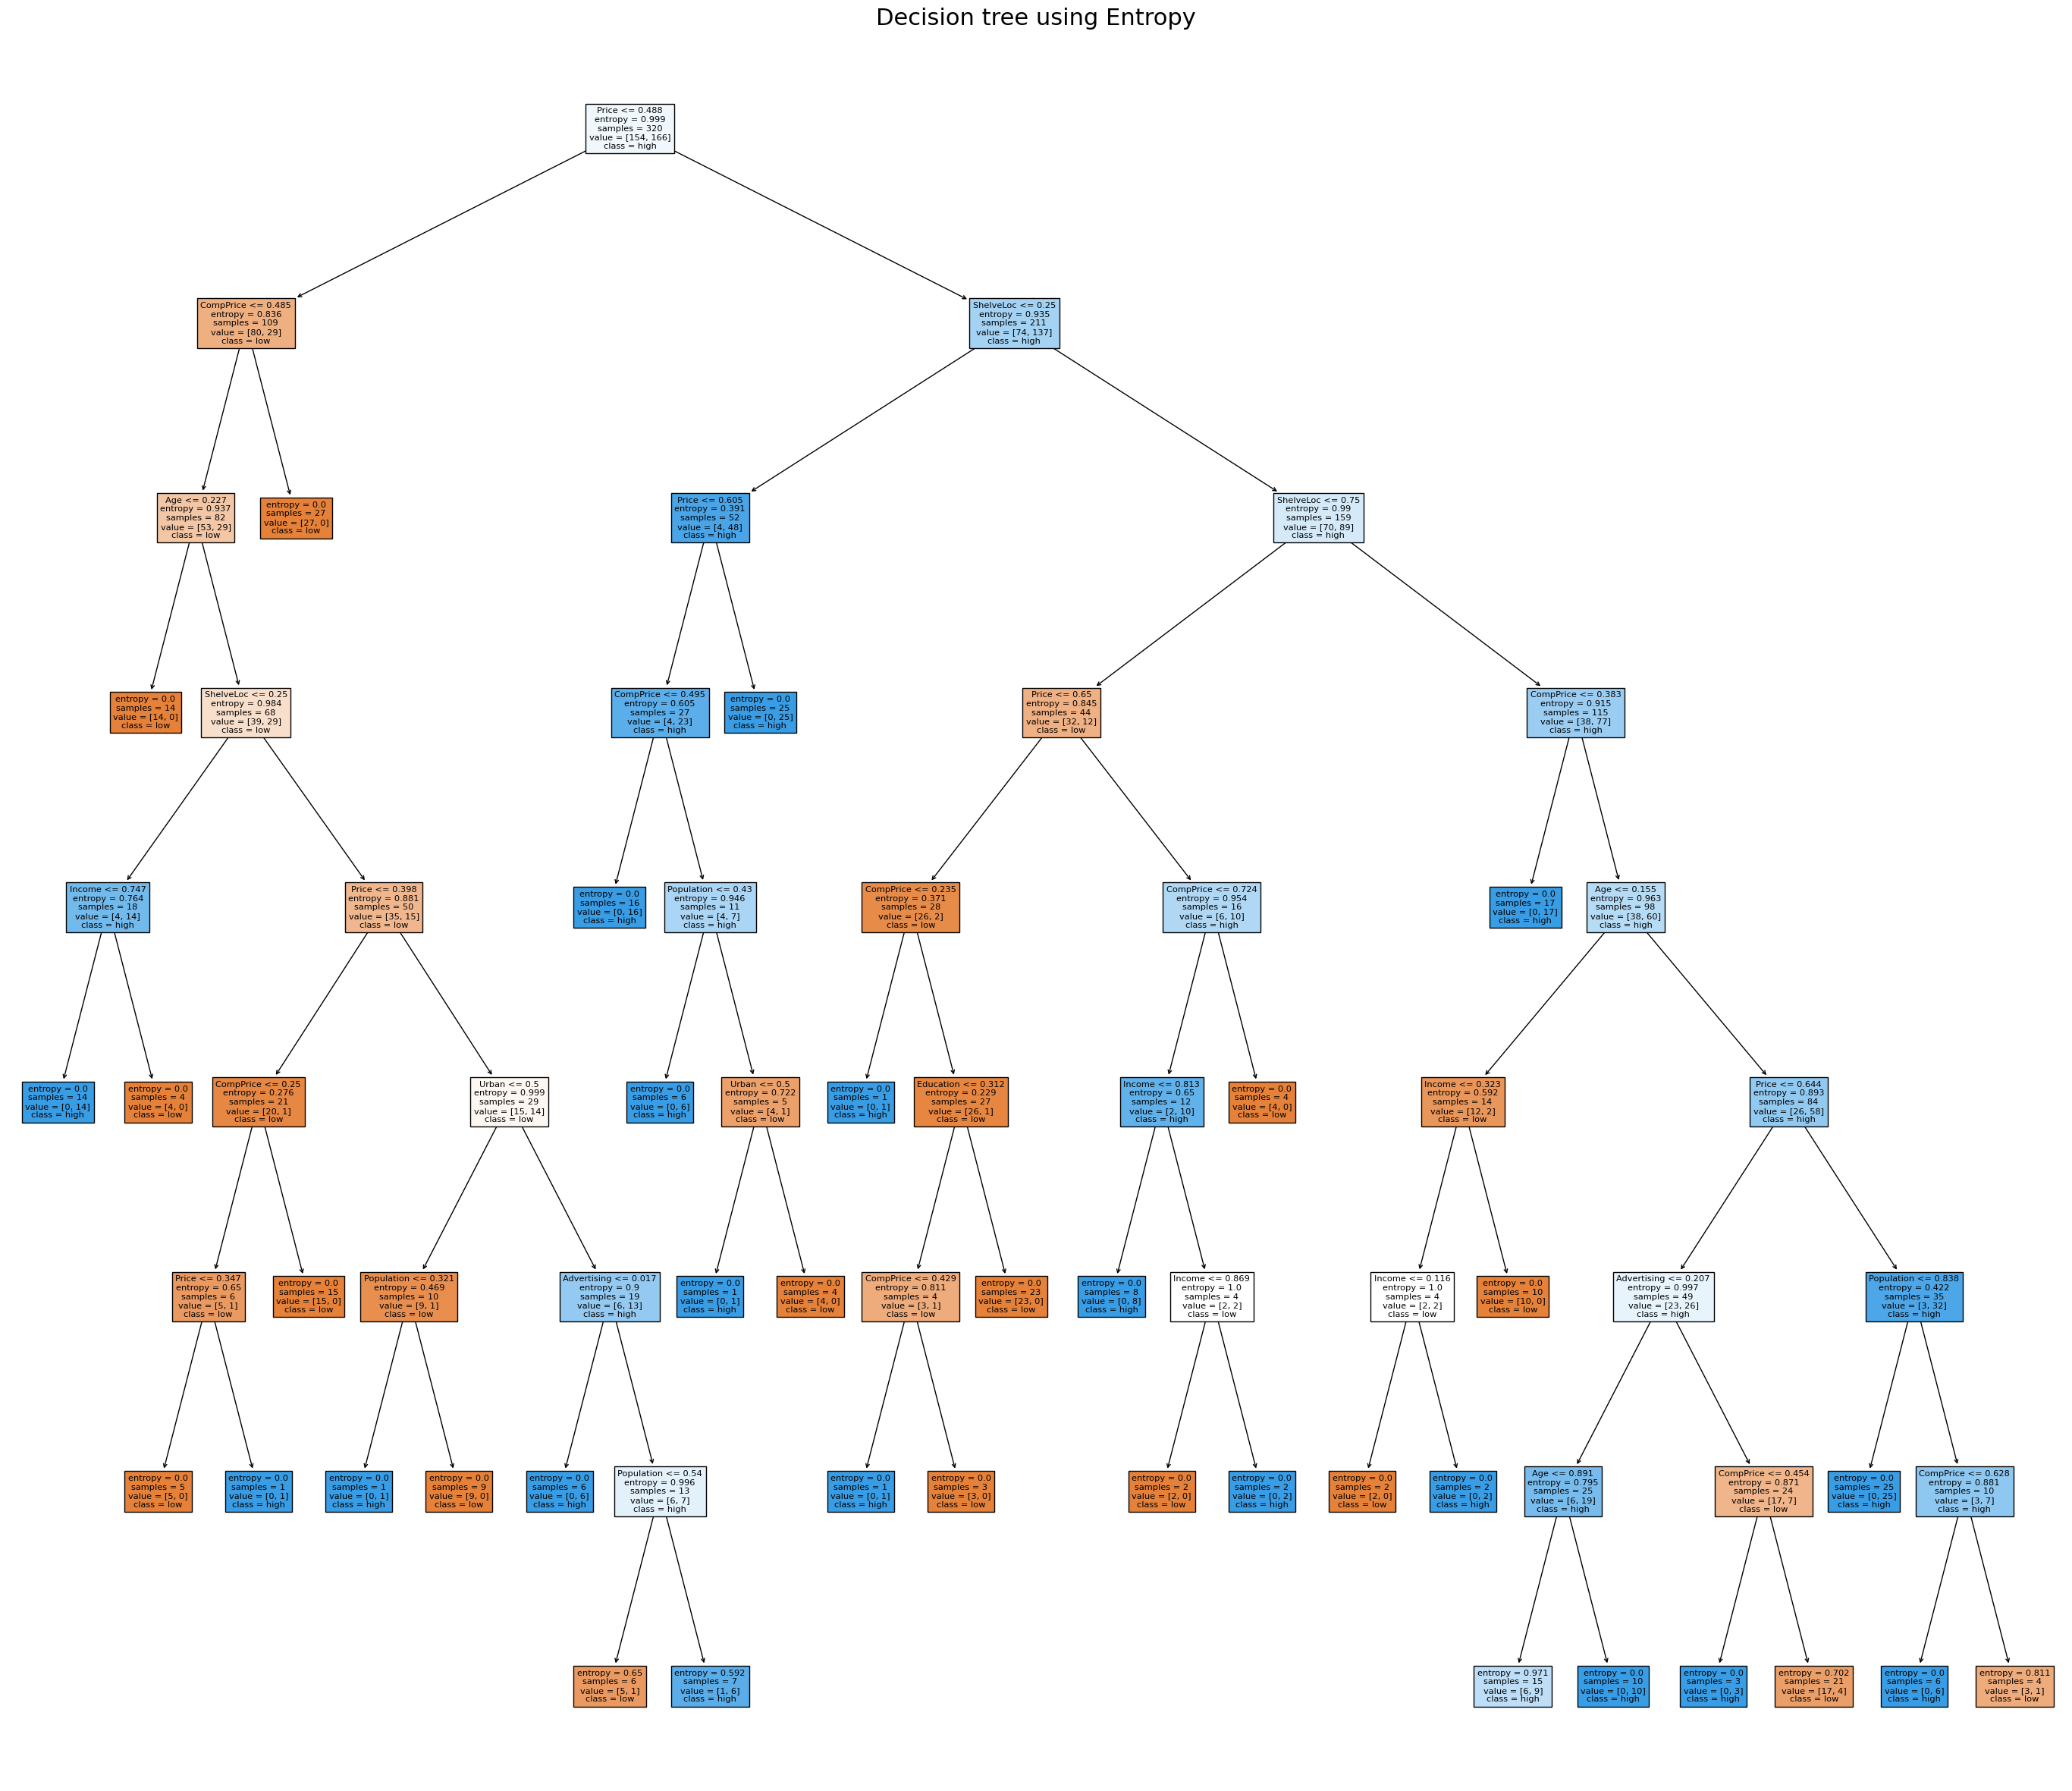

In [120]:
fig = plt.figure(figsize=(35,30))
fig = tree.plot_tree(model1,
                     feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education', 
                                     'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)

In [123]:
y_pred=model1.predict(x_test)
y_pred1=model1.predict(x_train)

In [124]:
print('test data accuracy',np.mean(y_pred==y_test))
print('train data accuracy',np.mean(y_pred1==y_train))

test data accuracy 0.7375
train data accuracy 0.959375


In [131]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        High       0.83      0.67      0.74        45
         Low       0.66      0.83      0.73        35

    accuracy                           0.74        80
   macro avg       0.75      0.75      0.74        80
weighted avg       0.76      0.74      0.74        80



# decision tree using gini index

In [125]:
model_g1=DecisionTreeClassifier(criterion = 'gini',max_depth=8)

In [126]:
model_g1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8)

Text(0.5, 1.0, 'Decision tree using Entropy')

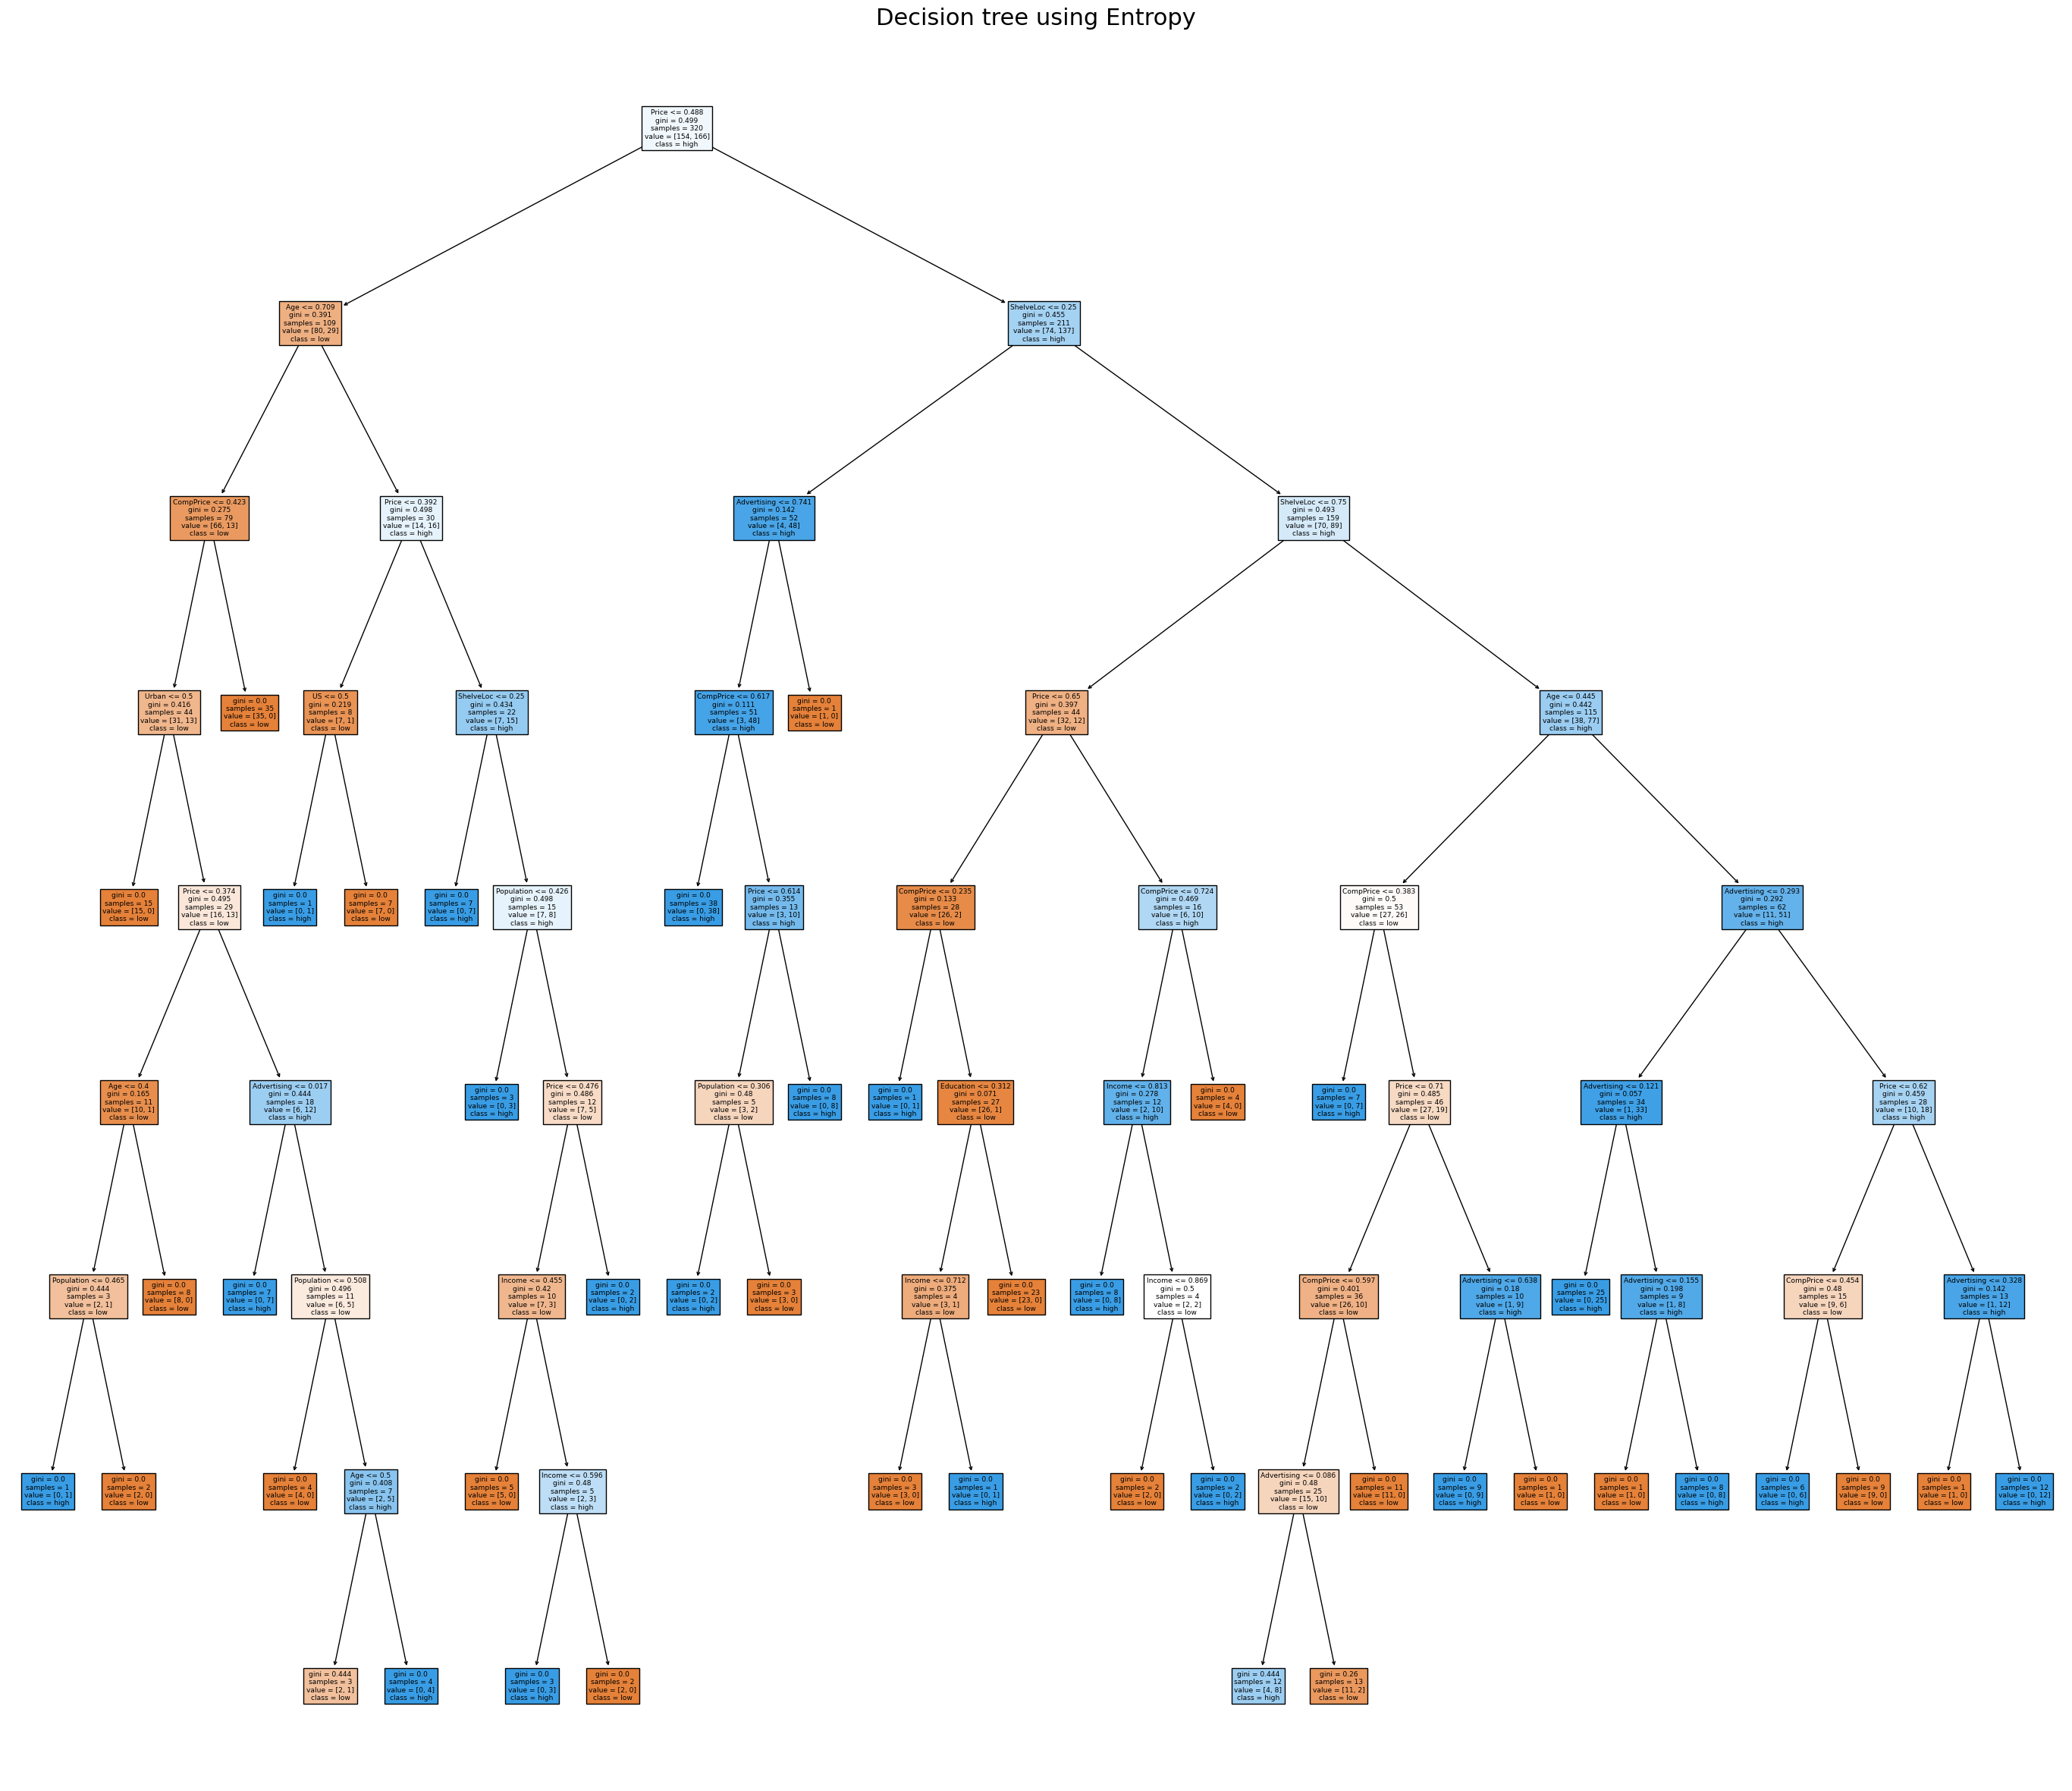

In [127]:
fig = plt.figure(figsize=(35,30))
fig = tree.plot_tree(model_g1,
                     feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education', 
                                     'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)

In [128]:
y_pred_g1=model_g1.predict(x_test)
y_pred_g2=model_g1.predict(x_train)

In [129]:
print('test data accuracy',np.mean(y_pred_g1==y_test))
print('train data accuracy',np.mean(y_pred_g2==y_train))

test data accuracy 0.675
train data accuracy 0.978125


In [134]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

        High       0.67      0.83      0.74        36
         Low       0.83      0.66      0.73        44

    accuracy                           0.74        80
   macro avg       0.75      0.75      0.74        80
weighted avg       0.76      0.74      0.74        80



# from above two model building using entropy and gini,entropy method seems to be more effectve than the gini index

In [132]:
model1.feature_importances_

array([0.21354064, 0.10692343, 0.04386442, 0.08005918, 0.25593332,
       0.15597909, 0.09451878, 0.01048265, 0.03869848, 0.        ])

In [133]:
x_train.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

# hence from the both of the tree's we can understand that the most important constraints of the given data are price ,Shelveloc,comp price